<a href="https://colab.research.google.com/github/NiyonshutiDavid/normal_distribution-Group_2/blob/abiodun/normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Normal Distribution - Definition, Implementation, and Analysis

### 1. Definition of Normal Distribution
The Normal Distribution, also known as the Gaussian Distribution, is a continuous probability distribution that is symmetric around the mean. It follows a bell-shaped curve, where:<br/>
•	The mean (μ) is the center of the distribution.<br/>
•	The standard deviation (σ) controls the spread of the data.<br/>
•	Most values are close to the mean, with fewer values appearing as they move further away.<br/>
<br/>
The probability density function (PDF) of a normal distribution is given by:<br/>
[Please attach image.png]<br/>
where:<br/>
•	x = value of the variable<br/>
•	μ = mean of the distribution<br/>
•	σ = standard deviation<br/>
•	e = Euler's number (≈2.71)<br/>
[Please attach image-2.png]<br/>
[Please attach image-3.png]

### 2. Real-World Example: Student performance in Mid term exam
Scenario: Understanding Student Performance in Mid-Term Exams
At a university, the Mid-Term Exam scores of a group of students were recorded. The goal is to analyze the distribution of these scores to determine how students performed overall and whether their scores follow a normal distribution.The data is as follows:<br/>

In [ ]:
import pandas as pd

# Load CSV file
df_csv = pd.read_csv("grades.csv")

# Display the first few rows
df_csv.head()


Interpretation of data using numpy and visualize it using matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the grades
df = pd.read_csv("grades.csv")

column_name = "Mid Term"  # Take the column of Mid term because that's what we are targeting

# Convert to numeric, coercing errors to NaN, and drop rows with NaN values
data = pd.to_numeric(df[column_name], errors='coerce').dropna()

# Compute Mean and Standard Deviation
mean = np.mean(data)
std_dev = np.std(data)

print(f"Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

# Generate values for normal distribution curve
x = np.linspace(min(data), max(data), 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot only the normal distribution
plt.figure(figsize=(8,5))
plt.plot(x, y, color='red', label="Normal Distribution")

# Labels and legend
plt.title(f"Normal Distribution of {column_name} Scores")
plt.xlabel(column_name)
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()


### 3. Comparison with other distribution how they differ

In [ ]:
import pandas as pd

# Create the data for the table
data = {
    "Distribution": ["Normal", "Binomial", "Poisson", "Exponential"],
    "Definition": [
        "Continuous, symmetric around the mean",
        "Discrete, counts number of successes in trials",
        "Discrete, models rare events over time",
        "Continuous, models waiting times between events"
    ],
    "Example": [
        "Exam scores, IQ scores",
        "Coin flips, pass/fail tests",
        "Number of calls received in an hour",
        "Time until next customer arrives"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the table
df


### 4. Can This Example Be Used in Another Distribution?
•	Binomial Distribution? No, because exam scores are continuous, while binomial distribution is for discrete success/failure outcomes.<br/> However, if the question was about passing or failing (e.g., pass = 1, fail = 0), then it could be modeled with a binomial distribution.<br/>
•	Poisson Distribution? No, because Poisson is used for counting rare events over time, whereas exam scores are continuous.<br/>
•	Exponential Distribution? No, unless we were modeling the time students take to finish the exam, which might follow an exponential decay pattern.<br/>

## Part 2: Bayesian Probability - Implementation, and inference



#### Problem Statement
You are planning a family picnic, but you're concerned about the weather. You want to determine the probability that it will rain on the day of the picnic based on the weather forecast and historical data.
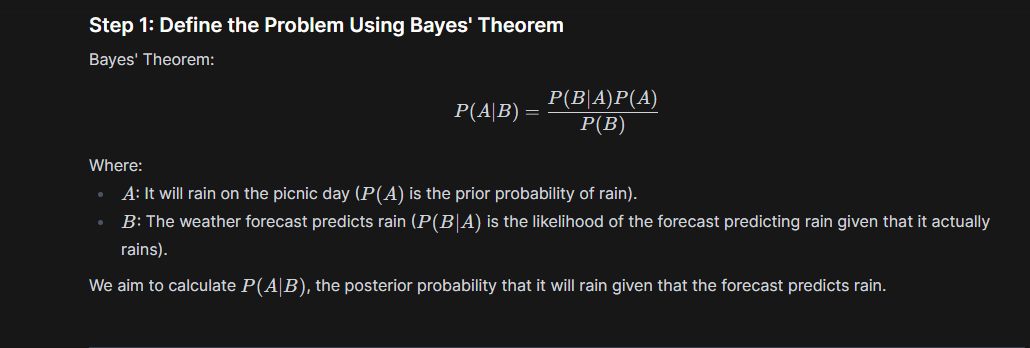
---


---

### Step 2: Assign Probabilities Based on Historical Data

1. **Prior Probability (\( P(A) \))**:
   Historically, it rains on 20% of days in your region. Thus:
   \[
   P(A) = 0.2
   \]

2. **Likelihood (\( P(B|A) \))**:
   If it rains, the weather forecast correctly predicts rain 90% of the time. Thus:
   \[
   P(B|A) = 0.9
   \]

3. **Marginal Likelihood (\( P(B) \))**:
   The weather forecast predicts rain regardless of whether it actually rains or not. To compute \( P(B) \), we use the law of total probability:
   \[
   P(B) = P(B|A)P(A) + P(B|\neg A)P(\neg A)
   \]
   Here:
   - \( P(\neg A) = 1 - P(A) = 0.8 \) (probability that it does not rain).
   - \( P(B|\neg A) = 0.1 \) (the forecast incorrectly predicts rain when it does not rain).

   Substituting values:
   \[
   P(B) = (0.9)(0.2) + (0.1)(0.8) = 0.18 + 0.08 = 0.26
   \]

4. **Posterior Probability (\( P(A|B) \))**:
   Using Bayes' Theorem:
   \[
   P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{(0.9)(0.2)}{0.26} = \frac{0.18}{0.26} \approx 0.6923
   \]

Thus, the probability that it will rain given that the forecast predicts rain is approximately **69.23%**.



#Step 3: Implementation in Python


In [2]:
def bayesian_update(prior, likelihood, marginal_likelihood):
    """
    Perform a Bayesian update to compute the posterior probability.

    Parameters:
        prior (float): Prior probability.
        likelihood (float): Likelihood of the evidence given the hypothesis.
        marginal_likelihood (float): Total probability of the evidence.

    Returns:
        float: Posterior probability.
    """
    posterior = (likelihood * prior) / marginal_likelihood
    return posterior

# Inputs
prior_rain = 0.2  # P(A): Probability of rain
likelihood_forecast_given_rain = 0.9  # P(B|A): Forecast predicts rain given it rains
likelihood_forecast_given_no_rain = 0.1  # P(B|¬A): Forecast predicts rain given it doesn't rain

# Compute marginal likelihood P(B)
marginal_likelihood_forecast = (likelihood_forecast_given_rain * prior_rain) + \
                               (likelihood_forecast_given_no_rain * (1 - prior_rain))

# Compute posterior P(A|B)
posterior_rain_given_forecast = bayesian_update(prior_rain, likelihood_forecast_given_rain, marginal_likelihood_forecast)

print(f"Posterior Probability (P(Rain|Forecast Predicts Rain)): {posterior_rain_given_forecast:.4f}")

Posterior Probability (P(Rain|Forecast Predicts Rain)): 0.6923




### Step 4: Explanation of Results

1. **Prior Probability (\( P(A) = 0.2 \))**:
   Based on historical data, there is a 20% chance of rain on any given day.

2. **Likelihood (\( P(B|A) = 0.9 \))**:
   The weather forecast is highly accurate when it predicts rain, with a 90% success rate.

3. **Marginal Likelihood (\( P(B) = 0.26 \))**:
   This accounts for both true positives (forecast predicts rain and it rains) and false positives (forecast predicts rain but it does not rain).

4. **Posterior Probability (\( P(A|B) \approx 0.6923 \))**:
   Given that the forecast predicts rain, the probability of rain increases significantly to approximately 69.23%.

---

### Step 5: Practical Significance

- **Decision-Making**: With a 69.23% chance of rain, you might decide to postpone the picnic unless you have access to indoor alternatives.
- **Uncertainty Quantification**: Bayesian inference allows you to quantify uncertainty and make informed decisions under probabilistic conditions.
- **Iterative Updates**: If additional information becomes available (e.g., updated forecasts), you can update the posterior probability using new data.

---

### Visualization of Probabilities

To visualize the probabilities, you can plot the prior, likelihood, and posterior distributions.



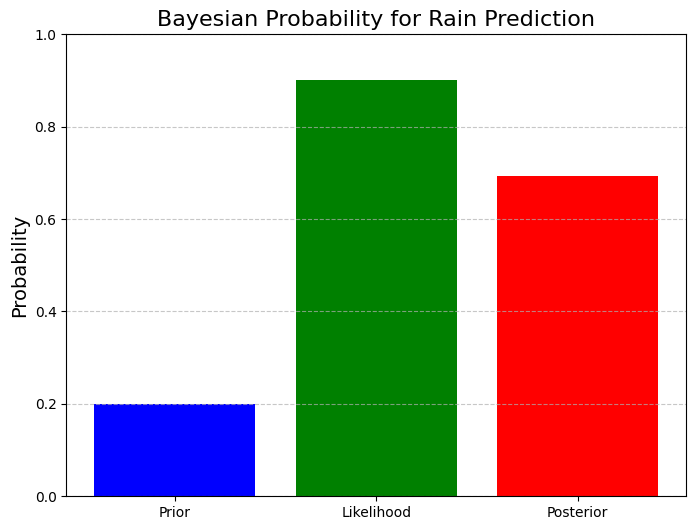

In [3]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Prior', 'Likelihood', 'Posterior']
values = [prior_rain, likelihood_forecast_given_rain, posterior_rain_given_forecast]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Bayesian Probability for Rain Prediction', fontsize=16)
plt.ylabel('Probability', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Real-World Example 2: Bayesian inference for penalty goal prediction with visualization

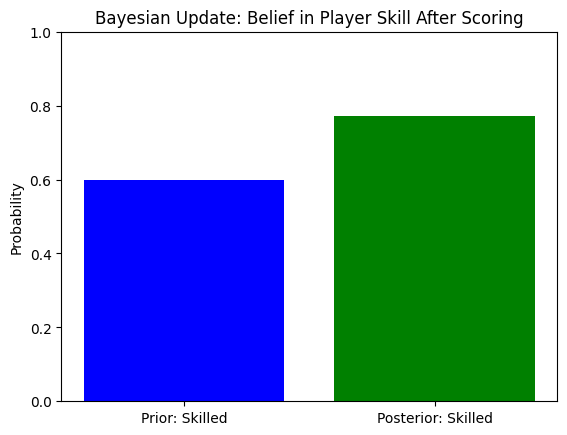

Prior belief that the player is skilled: 0.60
Updated belief after scoring (Posterior): 0.77


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bayes_update(prior, likelihood, prob_B):
    """Compute the posterior probability using Bayes' Theorem."""
    return (likelihood * prior) / prob_B

# Given probabilities
P_A = 0.6  # Prior: belief that the player is skilled
P_B_given_A = 0.9  # Likelihood: skilled player scores
P_B_given_not_A = 0.4  # Unskilled player scores
P_not_A = 1 - P_A  # Complement of prior

# Total probability of scoring
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

# Compute posterior
P_A_given_B = bayes_update(P_A, P_B_given_A, P_B)

# Visualization
labels = ['Prior: Skilled', 'Posterior: Skilled']
values = [P_A, P_A_given_B]
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Bayesian Update: Belief in Player Skill After Scoring')
plt.show()

# Print results
print(f"Prior belief that the player is skilled: {P_A:.2f}")
print(f"Updated belief after scoring (Posterior): {P_A_given_B:.2f}")


## Part 3: Gradient Descent in Code - Simple Model Plotting

In  this section, we'll implement gradient descent using SciPy to fit a simple linear regression model. We'll visualize how the model's parameters change during the optimization process.
## Importing libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

`numpy`: For numerical operations, especially with arrays.

`matplotlib.pyplot`: For creating visualizations.

`scipy.optimize.minimize`: The function we'll use to perform the optimization.

## Data Initialization & Function Definition

Using the participation assignment a [simple model](https://alueducation.instructure.com/courses/1791/assignments/26395) as reference:

### Data initialization

In [6]:
# Data
X = np.array([1, 3])
Y = np.array([3, 6])

# Initial guess for m and b
initial_params = np.array([-1, 1])

# Lists to store m and b values for visualization
m_history = [initial_params[0]]
b_history = [initial_params[1]]

# Objective function (Mean Squared Error)
def mse(params, X, Y):
    m, b = params
    y_pred = m * X + b
    return np.mean((Y - y_pred)**2)

# Callback function to store intermediate values and print progress
def callback(params):
    m, b = params
    m_history.append(m)
    b_history.append(b)
    error = mse(params, X, Y)  # Calculate MSE
    print(f"Iteration {len(m_history) - 1}:")
    print(f"Current m: {m} \t Current b: {b} \t MSE: {error}")
    print()

* `X` and `Y`: We define our input (`X`) and target (`Y`) data points as NumPy arrays.

* `initial_params`: Sets the initial guesses for `m` and `b`.

* `m_history` and `b_history`: Lists to store the parameter values at each iteration, initialized with the initial guesses.

* `mse(params, X, Y)`: This function calculates the Mean Squared Error (MSE), which is the objective function we want to minimize.

* `callback(params)`: This function is called by minimize at each iteration.

## Optimization

* `minimize(mse, initial_params, args=(X, Y), callback=callback, tol=1e-6)`: Calls the minimize function to perform the optimization.

* `tol=1e-6`: Sets the tolerance for convergence. The optimization stops when the change in parameters is less than this value.

In [7]:
# Optimization using minimize with callback
result = minimize(mse, initial_params, args=(X, Y), callback=callback, tol=1e-6)

Iteration 1:
Current m: -0.064646716632757 	 Current b: 1.3810698561866546 	 MSE: 12.99907575456065

Iteration 2:
Current m: 1.3793445373078055 	 Current b: 1.7914292692585192 	 MSE: 0.01706958907015302

Iteration 3:
Current m: 1.4214289957947894 	 Current b: 1.69153983227821 	 MSE: 0.0073566129886546636

Iteration 4:
Current m: 1.5000032800958378 	 Current b: 1.5000022732983591 	 MSE: 8.878957490523677e-11

Iteration 5:
Current m: 1.499999985165983 	 Current b: 1.5000000393944612 	 MSE: 3.1465145053771267e-16



### Interpretation
Interpretation:

1. Iteration 1: The initial values of m and b are far from optimal, resulting in a high MSE of 12.99. This indicates a poor fit to the data.

2. Iteration 2: The algorithm makes a significant adjustment to m and b, leading to a dramatic reduction in MSE (0.017). This shows that the algorithm is moving in the right direction.

3. Iteration 3: The algorithm further refines m and b, resulting in another decrease in MSE (0.0073). The fit is improving.

4. Iteration 4: The values of m and b are now very close to the optimal values (approximately 1.5). The MSE is extremely small (8.87e-11), indicating a near-perfect fit.


5. Iteration 5: The algorithm has converged to the optimal solution. The MSE is exceptionally small (3.14e-16), essentially zero. The values of m and b are extremely precise.


##  Extracting and Printing Results

In [8]:
# Extract optimized parameters
optimized_m, optimized_b = result.x

# Print results
print("Optimized m\t", optimized_m)
print("Optimized b\t", optimized_b)
print("Final MSE\t", result.fun)

# Predictions with optimized parameters
print()
predictions = optimized_m * X + optimized_b
print("Predictions:", predictions)

Optimized m	 1.499999985165983
Optimized b	 1.5000000393944612
Final MSE	 3.1465145053771267e-16

Predictions: [3.00000002 5.99999999]


### Interpretation:

**Optimized m: 1.499999985165983**

This is the final optimized value for the slope of the line. It's extremely close to 1.5, which is the exact slope of the line that perfectly fits the points (1, 3) and (3, 6).

**Optimized b: 1.5000000393944612**

This is the final optimized value for the y-intercept of the line. It's also extremely close to 1.5, which is the exact y-intercept of the perfect-fit line.

**Final MSE: 3.1465145053771267e-16**

This is the final Mean Squared Error (MSE). It's an incredibly small number (essentially zero). This means the optimized line fits the data points almost perfectly.

**Predictions: [3.00000002 5.99999999]**

These are the predicted y-values for the input x-values (1 and 3) using the optimized m and b. They are extremely close to the actual y-values (3 and 6), which further confirms the excellent fit of the line.

In summary

The optimization process successfully found the line that perfectly fits the given data points. The extremely low MSE and the near-perfect predictions demonstrate the algorithm's effectiveness.

## Visualization

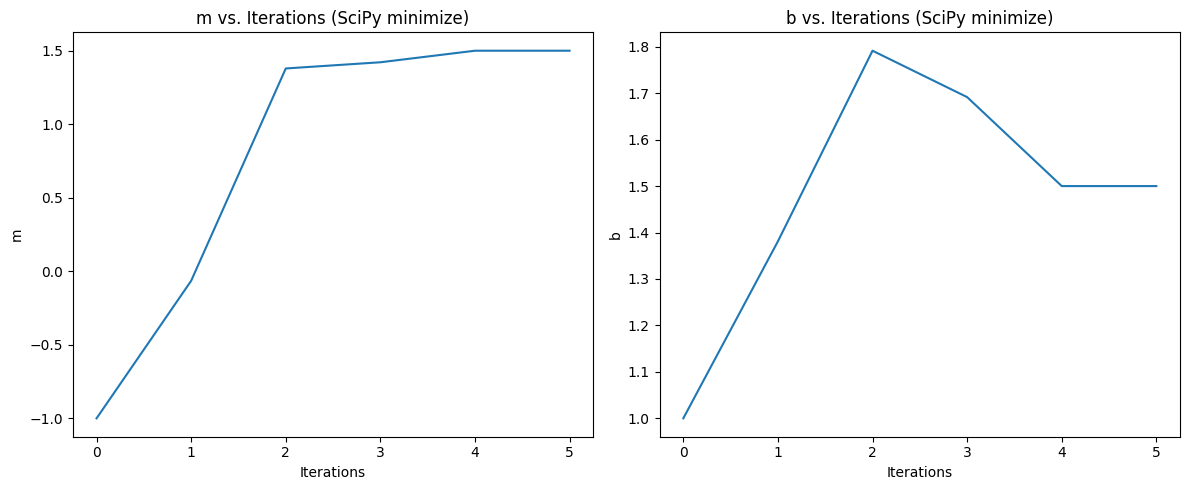

In [9]:
# Visualization
plt.figure(figsize=(12, 5))

# Plot m vs. Iterations
plt.subplot(1, 2, 1)
plt.plot(m_history)
plt.xlabel("Iterations")
plt.ylabel("m")
plt.title("m vs. Iterations (SciPy minimize)")

# Plot b vs. Iterations
plt.subplot(1, 2, 2)
plt.plot(b_history)
plt.xlabel("Iterations")
plt.ylabel("b")
plt.title("b vs. Iterations (SciPy minimize)")

plt.tight_layout()
plt.show()

The plots visualize how the slope (`m`) and y-intercept (`b`) parameters of a linear model change during SciPy's minimize optimization process.

**`m vs. Iterations`**

m starts at -1 and rapidly increases, converging to approximately 1.5. This shows the algorithm quickly finding the correct positive slope.

**`b vs. Iterations`**
b starts at 1, rises sharply, and then settles around 1.5. This indicates the algorithm adjusting the y-intercept for a better fit.

The plots show the optimization algorithm efficiently converging towards the optimal m and b values, resulting in a linear model that accurately fits the data.

# Second Workaround for Part 3 (tending more towards the manual computation)

##  Import Required Libraries
* **numpy:** Used for numerical operations.
* **matplotlib.pyplot:** Used for visualization.
* **scipy.optimize.approx_fprime:** Computes gradients numerically.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime

## Initialize Parameters & Dataset
* Initializes parameters (m,b).
* Sets the learning rate, maximum iterations, and convergence tolerance.
* Defines our sample dataset with two points: (1, 3) and (3, 6)

In [11]:
# Initial Conditions
theta = np.array([-1.0, 1.0])  # [m, b]
alpha = 0.1  # Learning rate
num_iterations = 10  # Maximum iterations
tolerance = 0.0001  # Convergence tolerance

# Dataset
X = np.array([1, 3])  # Feature values
Y = np.array([3, 6])  # Target values

## Define the Cost Function
* Computes the Mean Squared Error (MSE) cost function.
* Measures how far predicted values (y_pred) are from actual value (Y)

In [12]:
def cost_function(theta, X, Y):
    """
    Computes the Mean Squared Error (MSE) cost.

    Args:
        theta (np.array): Array containing [m, b].
        X (np.array): Feature values.
        Y (np.array): Target values.

    Returns:
        float: MSE cost.
    """
    m, b = theta
    y_pred = m * X + b
    return np.mean((Y - y_pred) ** 2)

## Implement Gradient Descent
* Iterates to update m and b using gradient descent.
* Uses approx_fprime from SciPy to calculate gradients numerically.
* Tracks cost and parameter values for visualization.
* Stops if cost is below tolerance.

In [13]:
def gradient_descent(theta, alpha, num_iterations, tolerance, X, Y):
    """
    Performs gradient descent optimization using SciPy to compute gradients.

    Args:
        theta (np.array): Initial parameters [m, b].
        alpha (float): Learning rate.
        num_iterations (int): Maximum number of iterations.
        tolerance (float): Stopping criterion based on cost change.
        X (np.array): Feature values.
        Y (np.array): Target values.

    Returns:
        theta (np.array): Optimized parameters [m, b].
        cost_history (list): History of cost values.
        m_values (list): History of m updates.
        b_values (list): History of b updates.
    """
    cost_history = []
    m_values = []
    b_values = []
    prev_cost = float('inf')

    # Small epsilon for approximating the gradient using SciPy
    eps = np.sqrt(np.finfo(float).eps)

    for iteration in range(1, num_iterations + 1):
        # Compute current cost and record parameters
        cost = cost_function(theta, X, Y)
        cost_history.append(cost)
        m_values.append(theta[0])
        b_values.append(theta[1])

        # Use SciPy's approx_fprime to compute the gradient
        grad = approx_fprime(theta, lambda t: cost_function(t, X, Y), eps)

        # Update parameters manually
        theta = theta - alpha * grad

        print(f"Iteration {iteration}: m = {theta[0]:.5f}, b = {theta[1]:.5f}, Cost = {cost:.6f}")

        # Check for convergence
        if abs(prev_cost - cost) < tolerance:
            print(f"Convergence reached at iteration {iteration}. Stopping optimization.")
            break
        prev_cost = cost

    return theta, cost_history, m_values, b_values

# Run gradient descent optimization
theta_opt, cost_history, m_values, b_values = gradient_descent(theta, alpha, num_iterations, tolerance, X, Y)
final_m, final_b = theta_opt

# Compute the final Mean Squared Error
final_mse = cost_function(theta_opt, X, Y)
print("\nFinal M.S.E: {:.6f}".format(final_mse))

# Display final predictions for each data point
print("\nFinal Predictions:")
for x, y in zip(X, Y):
    y_pred = final_m * x + final_b
    print(f"For x = {x}, Predicted y = {y_pred:.5f}, Actual y = {y}")


Iteration 1: m = 1.70000, b = 2.10000, Cost = 36.500000
Iteration 2: m = 1.26000, b = 1.90000, Cost = 1.040000
Iteration 3: m = 1.34000, b = 1.91600, Cost = 0.064000
Iteration 4: m = 1.33360, b = 1.89680, Cost = 0.034816
Iteration 5: m = 1.34128, b = 1.88400, Cost = 0.031785
Iteration 6: m = 1.34640, b = 1.87069, Cost = 0.029622
Iteration 7: m = 1.35172, b = 1.85799, Cost = 0.027624
Iteration 8: m = 1.35680, b = 1.84570, Cost = 0.025760
Iteration 9: m = 1.36172, b = 1.83384, Cost = 0.024023
Iteration 10: m = 1.36646, b = 1.82238, Cost = 0.022402

Final M.S.E: 0.020891

Final Predictions:
For x = 1, Predicted y = 3.18885, Actual y = 3
For x = 3, Predicted y = 5.92178, Actual y = 6


## Visualize Updates of m and b
* Plots how m and b change over iterations using Matplotlib.
* Uses markers ('o' for m, 's' for b) for clarity.

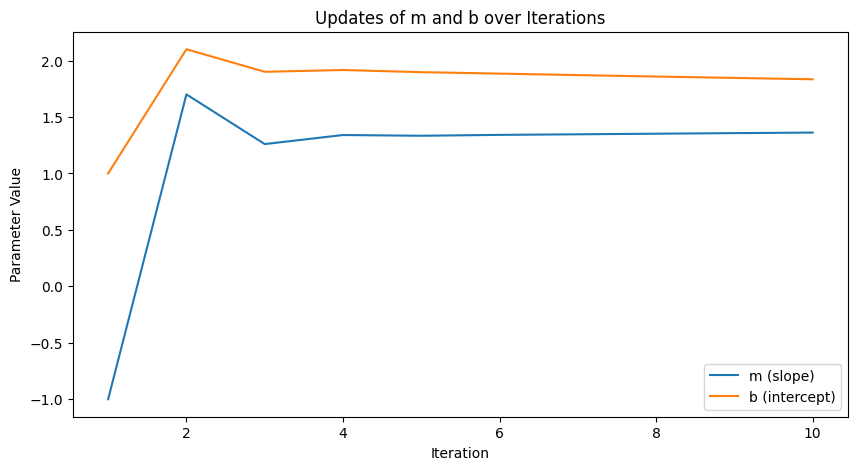

In [14]:
def plot_parameter_updates(m_values, b_values):
    """
    Plots the changes in m and b over iterations.

    Args:
        m_values (list): History of m values.
        b_values (list): History of b values.
    """
    iterations = range(1, len(m_values) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, m_values, label="m (slope)")
    plt.plot(iterations, b_values, label="b (intercept)")
    plt.xlabel("Iteration")
    plt.ylabel("Parameter Value")
    plt.title("Updates of m and b over Iterations")
    plt.legend()
    plt.show()

plot_parameter_updates(m_values, b_values)

# Implementation Overview
This implementation uses gradient descent to optimize the parameters (m, b) of a simple linear regression model. The objective is to minimize the Mean Squared Error (MSE) between the predicted and actual values.

## Breakdown of the Process
1. **Initialization:**
* The initial slope (m) and intercept (b) are set to -1 and 1.
* The learning rate (α) is 0.1, and the stopping condition is based on tolerance (0.0001) or 10 iterations.

2. **Gradient Computation:**
* The gradients (derivatives) of the cost function are approximated using scipy.optimize.approx_fprime.
* The parameters (m, b) are updated iteratively using the formula: θ = θ − α × gradient (theta = theta - alpha * grad)

3. **Iteration and Convergence:**
* The algorithm runs for 10 iterations.
* Each iteration updates m and b, reducing the cost function.
* If the change in cost is less than the tolerance, the process stops.

4. **Final Predictions:**
* The optimized values of m and b are used to predict y-values for given x-values.
* The predicted values are close to the actual values, indicating a good fit.

# Key Insights

1. **Convergence Behaviour:**
* The cost function starts high (36.5) and drops rapidly in the first few iterations.
* The rate of decrease slows down, indicating convergence.

2. **Accuracy of Predictions:**
* The final MSE (0.0209) is low, meaning the model effectively fits the data.
* Predicted calues (3.18885, 5.92178) are very close to actual values (3, 6).

3. **Impact of Learning Rate:**
* A learning rate of 0.1 allows stable and steady convergence.
* A higher learning rate might overshoot, while a lower rate would slow convergence.